# Project: Wrangling and Analyze Data

In [1060]:
#Import libraries that will be used on the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
import os
import json

In [1061]:
#reading twitter-archieved-enchanced
tweet= pd.read_csv("C:/Users/TonyC/Desktop/Udacity/Data Wrangling Module/Project 2/Dataset/twitter-archive-enhanced.csv")

In [1062]:
#to download images.tsv
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
folder = "C:/Users/TonyC/Desktop/Udacity/Data Wrangling Module/Project 2/Dataset"
r = requests.get(url)
with open(os.path.join(folder, url.split('/')[-1]), mode = 'wb') as file:
        file.write(r.content)

In [1063]:
# Reading Image_prediction
images = pd.read_csv('C:/Users/TonyC/Desktop/Udacity/Data Wrangling Module/Project 2/Dataset/image-predictions.tsv',sep='\t')

In [1064]:
#Empty list to convert to DataFrame

df_list = []

#Open text file for reading
with open ('C:/Users/TonyC/Desktop/Udacity/Data Wrangling Module/Project 2/Dataset/tweet-json.txt', 'r') as file:
    for line in file.readlines():
# Read each JSON string status into a dictionary and reading each line as a dictionary
        txt = json.loads(line)
#values for id
        tweet_id= txt['id']
#values for favorite_count
        likes = txt['favorite_count']
#values for retweet_count
        retweets = txt["retweet_count"]
#values for lang
        lang =txt['lang']
#appending
        df_list.append({'tweet_id': tweet_id,
                       'retweets': retweets,
                       'likes': likes})

#naming columns to a dataframe       
api = pd.DataFrame(df_list, columns=['tweet_id', 'retweets', 'likes'])   

## Assessing Data

In [1066]:
tweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [1067]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1068]:
api.head()

,tweet_id,retweets,likes,language
0,892420643555336193,8853,39467,NaN
1,892177421306343426,6514,33819,NaN
2,891815181378084864,4328,25461,NaN
3,891689557279858688,8964,42908,NaN
4,891327558926688256,9774,41048,NaN


In [1069]:
#sample
api.sample(5)

,tweet_id,retweets,likes,language
249,845098359547420673,8640,0,NaN
563,802323869084381190,6808,18124,NaN
148,863079547188785154,1195,9094,NaN
1905,674447403907457024,393,1137,NaN
757,778408200802557953,5023,15135,NaN


In [1070]:
#sample
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
1115,724983749226668032,https://pbs.twimg.com/media/Cg-o3w0WgAANXdv.jpg,1,golden_retriever,0.675750,True,Great_Pyrenees,0.095168,True,cocker_spaniel,0.076043,True
342,672256522047614977,https://pbs.twimg.com/media/CVRVvRMWEAIBKOP.jpg,1,ostrich,0.999004,False,Arabian_camel,0.000512,False,llama,0.000147,False
2015,879492040517615616,https://pbs.twimg.com/media/DDSVWMvXsAEgmMK.jpg,1,German_short-haired_pointer,0.479896,True,vizsla,0.124353,True,bath_towel,0.073320,False
1765,826598365270007810,https://pbs.twimg.com/media/C3iq0EEXUAAdBYC.jpg,1,French_bulldog,0.628119,True,Siamese_cat,0.117397,False,cougar,0.082765,False


In [1071]:
#sample
tweet.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1180,719339463458033665,NaN,NaN,2016-04-11 01:41:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lucy and Sophie. They think they'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719339463...,10,10,Lucy,None,None,None,None
1144,727286334147182592,NaN,NaN,2016-05-02 23:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I swear to god if we get sent another Blue Mad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727286334...,9,10,None,None,None,None,None
861,763103485927849985,NaN,NaN,2016-08-09 20:03:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Belle. She's a Butterflop Hufflepoof. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/763103485...,10,10,Belle,None,None,None,None
777,776088319444877312,NaN,NaN,2016-09-14 16:00:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can't tap the screen to make the hearts appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776088319...,10,10,None,None,None,None,None
289,838201503651401729,NaN,NaN,2017-03-05 01:36:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Sunny. He can take down a ...,8.207497e+17,4.196984e+09,2017-01-15 21:49:15 +0000,https://twitter.com/dog_rates/status/820749716...,13,10,Sunny,None,None,None,None


In [1072]:
#columns and rows
api.shape

(2354, 4)

In [1073]:
#columns and rows
tweet.shape

(2356, 17)

In [1074]:
#columns and rows
images.shape

(2075, 12)

In [1075]:
#info
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [1076]:
#info
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1077]:
#info
api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2354 non-null   int64  
 1   retweets  2354 non-null   int64  
 2   likes     2354 non-null   int64  
 3   language  0 non-null      float64
dtypes: float64(1), int64(3)
memory usage: 73.7 KB


In [1078]:
# Describe method on tweet
tweet.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [1079]:
# Describe method on images
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [1080]:
# Describe method on api
api.describe()

,tweet_id,retweets,likes,language
count,2.354000e+03,2354.000000,2354.000000,0.0
mean,7.426978e+17,3164.797366,8080.968564,NaN
std,6.852812e+16,5284.770364,11814.771334,NaN
min,6.660209e+17,0.000000,0.000000,NaN
25%,6.783975e+17,624.500000,1415.000000,NaN
50%,7.194596e+17,1473.500000,3603.500000,NaN
75%,7.993058e+17,3652.000000,10122.250000,NaN
max,8.924206e+17,79515.000000,132810.000000,NaN


In [1081]:
# null values
tweet.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [1082]:
# null values
images.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [1083]:
# null values
api.isnull().sum()

tweet_id       0
retweets       0
likes          0
language    2354
dtype: int64

In [1084]:
tweet.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [1239]:
tweet.name.sample(10)

12         None
590     Jeffrey
770        None
78         None
1027      Arlen
253        Luna
2176     Samsom
836        Tito
2319      Scout
2330       None
Name: name, dtype: object

In [1240]:
# Value count
tweet.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [1086]:
tweet.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [1087]:
# duplicated values
tweet.duplicated().sum()

0

In [1088]:
# duplicated values
images.duplicated().sum()

0

In [1089]:
# duplicated values
api.duplicated().sum()

0

In [1090]:
# unique values
tweet.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [1091]:
# unique values
api.nunique()

tweet_id    2354
retweets    1724
likes       2007
language       0
dtype: int64

In [1092]:
# unique values
images.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [1093]:
tweet.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [1094]:
tweet.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [1095]:
tweet.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [1096]:
tweet.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [1097]:
images.shape

(2075, 12)

#### Misssing Data
- missing data from api (2 row entries).
- In_reply_to_status_id,in_reply_to_user_id, retweeted_timestamp to datatime, retweeted_status_id and retweeted_user_id, expanded_url all contains missing values.
- images has 2075 entries

### Tidiness issues
#### tweet
- doggo,pupper and puppo should in a single column called maturity to be considered a dog growth
- multiple entries for tweet_id
- merge all dataframes to one
- text has different irregular values on it which involves website and fraction so drop it
- source has tag which can be removed to reveal the original source

### Quality issues

#### General
- tweet_id dtype to object to make it considered as int.

#### Tweet
- None in dataframe exists in place of null_values.
- lowercase values in **name** represented unknown values which will be coverted to np.nan.
- drop irrelevant feature entries for; in_reply_to_status_id,in_reply_to_user_id, retweeted_timestamp to datatime, retweeted_status_id and retweeted_user_id, because they are not useful to the analysis.
- drop feature expanded_url and floofer because they are not useful to the analysis
- Incorrect dtypes convert; timestamp to datatime, maturity and source to category.

#### api
- modify dtype for language to categorical.

#### images
-  Inconsistent naming scheme on p1,p2,p3.

## Cleaning Data

In [1098]:
# Make copies of original pieces of data
tweet_clean= tweet.copy()
images_clean= images.copy()
api_clean= api.copy()

### Missing data

#### Define
Use retweeted_status_id as a reference to define a new dataframe for which retweeted and in_reply_to_status_id for in_reply entries,since they are not focus and won't be need for the analysis.

#### Code

In [1099]:
#making the dataset the entries with the null values in the dataset
tweet_clean=tweet_clean[tweet_clean.retweeted_status_id.isnull()]
tweet_clean=tweet_clean[tweet_clean.in_reply_to_status_id.isnull()]

#### Test

In [1100]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [1101]:
tweet_clean.shape

(2097, 17)

In [1102]:
# this should be equal to the shape
tweet_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2097
in_reply_to_user_id           2097
timestamp                        0
source                           0
text                             0
retweeted_status_id           2097
retweeted_status_user_id      2097
retweeted_status_timestamp    2097
expanded_urls                    3
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

## Tidiness and Quality Solutions

## Tweet

### Replacing Unknown or None entries to np.nan

#### Define
- make a list for all the lowercase string in the name feature
- replace the list to np.nan
- replacing all the None entries in doggo, pupper,floffer,puppo to np.nan


#### Code

In [1103]:
#Create a list to contain all the names that starts with lowercase in the name feature on tweet
lowercase = []

for name in tweet_clean.name:
    if name.islower() and name not in lowercase:
        lowercase.append(name)
    
print(lowercase)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [1104]:
#replace None with NAN in tweet_clean
tweet_clean.replace('None', np.nan, inplace=True)

#replace lowercase list with NAN in tweet_clean
tweet_clean.name.replace(lowercase, np.nan,inplace=True)

#### Test

In [1105]:
tweet_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [1106]:
tweet_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2097
in_reply_to_user_id           2097
timestamp                        0
source                           0
text                             0
retweeted_status_id           2097
retweeted_status_user_id      2097
retweeted_status_timestamp    2097
expanded_urls                    3
rating_numerator                 0
rating_denominator               0
name                           707
doggo                         2014
floofer                       2087
pupper                        1867
puppo                         2073
dtype: int64

### Merging features to a single column

#### Define
- Merge feature doggo,pupper and puppo to a column called maturity


#### Code

In [1107]:
#merging doggo, pupper and puppo features to a single
tweet_clean['maturity']= tweet_clean[['doggo', 'pupper', "puppo"]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

#### Test

In [1108]:
tweet_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,maturity
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,


In [1109]:
tweet_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2097
in_reply_to_user_id           2097
timestamp                        0
source                           0
text                             0
retweeted_status_id           2097
retweeted_status_user_id      2097
retweeted_status_timestamp    2097
expanded_urls                    3
rating_numerator                 0
rating_denominator               0
name                           707
doggo                         2014
floofer                       2087
pupper                        1867
puppo                         2073
maturity                         0
dtype: int64

In [1110]:
tweet_clean.maturity.value_counts()

                1770
pupper           221
doggo             73
puppo             23
doggo,pupper       9
doggo,puppo        1
Name: maturity, dtype: int64

### Dropping features

#### Define
- Dropping irrelevant and merged features like in_reply_to_status_id, in_reply_to_user_id, doggo, pupper, puppo,floofer rating_numerator, rating_denominator, retweeted_status_timestamp, retweeted_status_id, retweeted_status_timestamp and expanded_urls from tweet because they consist of mostly 90% missing data and not useful to the analysis
- add all of these in a list and drop
- replace empty values in maturity to np.nan

#### Code

In [1111]:
#list for columns to drop
droplist = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','doggo','pupper','puppo','floofer','expanded_urls']

In [1112]:
# dropping the features
tweet_clean = tweet_clean.drop(droplist, axis=1)

# replacing all empty values back to nan
tweet_clean.replace('', np.nan, inplace=True)

#### Test

In [1114]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   rating_numerator    2097 non-null   int64 
 5   rating_denominator  2097 non-null   int64 
 6   name                1390 non-null   object
 7   maturity            327 non-null    object
dtypes: int64(3), object(5)
memory usage: 147.4+ KB


In [1115]:
tweet_clean.name.head(5)

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
Name: name, dtype: object

### Cleaning up tags in source

#### Define:
- Take the html tags on the source feature to reveal the exact source using regex

#### Code

In [1116]:
# removing tags from source and replacing the column with the values extracted
tweet_clean.source = tweet_clean.source.str.extract(r'(Vine|TweetDeck|Twitter...........)',expand=True)

#### Test

In [1117]:
tweet_clean.source.value_counts()

Twitter for iPhone    1964
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

## Images

### Inconsistent naming from p1, p2 and p3

#### Define
Transform every entry on the respective feature to lowercase

#### Code

In [1122]:
# converting all str in p1,p2 and p3 to lowercase
images_clean["p1"] = images_clean["p1"].str.lower()
images_clean["p2"] = images_clean["p2"].str.lower()
images_clean["p3"] = images_clean["p3"].str.lower()

#### Test

In [1123]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


## General

### Converting dtypes on all dataframes

### Define
**Tweet**
- timestamp from int to datatime
- tweet_id from float to int
- maturity from object to category dtype
- source from object to category

#### Code

In [1124]:
# coverting to best dtypes for tweet_clean
tweet_clean.tweet_id = tweet_clean.tweet_id.astype(np.int64)
tweet_clean.timestamp = pd.to_datetime(tweet_clean.timestamp,dayfirst=True)
tweet_clean.maturity = tweet_clean.maturity.astype('category')
tweet_clean.source = tweet_clean.source.astype('category')

#### Test

In [1126]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   category           
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                1390 non-null   object             
 7   maturity            327 non-null    category           
dtypes: category(2), datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 119.2+ KB


### Merging Dataframes

#### Define
- merge tweet_clean and images_clean dataframe on tweet_id as a reference 
- then merge api_clean

#### Code

In [1129]:
# merging
combined_data = pd.merge(tweet_clean,api_clean, on='tweet_id', how='left')
combined_data = pd.merge(combined_data,images_clean, on='tweet_id', how='left')

#### Test

In [1130]:
combined_data.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,maturity,retweets,likes,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8853,39467,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [1131]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   category           
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                1390 non-null   object             
 7   maturity            327 non-null    category           
 8   retweets            2097 non-null   int64              
 9   likes               2097 non-null   int64              
 10  language            0 non-null      float64            
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

In [1132]:
# Saving the master dataset to a csv file
combined_data.to_csv("C:/Users/TonyC/Desktop/Udacity/Data Wrangling Module/Project 2/Dataset/twitter_archive_master.csv", index=False)

## Assessing and Reading Dataset

In [1133]:
# reading twitter_archive_master
df= pd.read_csv("C:/Users/TonyC/Desktop/Udacity/Data Wrangling Module/Project 2/Dataset/twitter_archive_master.csv")
df.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,maturity,retweets,likes,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8853,39467,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


## Ananlysis

#### Define
Getting the correct prediction for each row

#### Code and Test

In [1135]:
# for p1
p1=df[['tweet_id','p1','p1_conf','p1_dog']]
# for p2
p2= df[['tweet_id','p2','p2_conf','p2_dog']]
# for p3
p3= df[['tweet_id','p3','p3_conf','p3_dog']]

tweet_id= df[['tweet_id']]

In [1136]:
p1.head(3)

,tweet_id,p1,p1_conf,p1_dog
0,892420643555336193,orange,0.097049,False
1,892177421306343426,chihuahua,0.323581,True
2,891815181378084864,chihuahua,0.716012,True


In [1137]:
p2.head(3)

,tweet_id,p2,p2_conf,p2_dog
0,892420643555336193,bagel,0.085851,False
1,892177421306343426,pekinese,0.090647,True
2,891815181378084864,malamute,0.078253,True


In [1138]:
p3.head(3)

,tweet_id,p3,p3_conf,p3_dog
0,892420643555336193,banana,0.076110,False
1,892177421306343426,papillon,0.068957,True
2,891815181378084864,kelpie,0.031379,True


In [1139]:
#drop columns that the boolean values are False for p1
p1.drop(p1.index[p1['p1_dog'] == False], inplace = True)

C:\Temp\ipykernel_33236\636877456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1.drop(p1.index[p1['p1_dog'] == False], inplace = True)


In [1140]:
#drop columns that the boolean values are False for p2
p2.drop(p2.index[p2['p2_dog'] == False], inplace = True)

C:\Temp\ipykernel_33236\1015346183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2.drop(p2.index[p2['p2_dog'] == False], inplace = True)


In [1141]:
#drop columns that the boolean values are False for p3
p3.drop(p3.index[p3['p3_dog'] == False], inplace = True)

C:\Temp\ipykernel_33236\3037776059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p3.drop(p3.index[p3['p3_dog'] == False], inplace = True)


In [1142]:
# drop all the nullvalues
p1.dropna(inplace=True)
p2.dropna(inplace=True)
p3.dropna(inplace=True)

C:\Temp\ipykernel_33236\1165426939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1.dropna(inplace=True)
C:\Temp\ipykernel_33236\1165426939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p2.dropna(inplace=True)
C:\Temp\ipykernel_33236\1165426939.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p3.dropna(inplace=True)


In [1143]:
p1.head(3)

,tweet_id,p1,p1_conf,p1_dog
1,892177421306343426,chihuahua,0.323581,True
2,891815181378084864,chihuahua,0.716012,True
4,891327558926688256,basset,0.555712,True


In [1144]:
p2.head(3)

,tweet_id,p2,p2_conf,p2_dog
1,892177421306343426,pekinese,0.090647,True
2,891815181378084864,malamute,0.078253,True
3,891689557279858688,labrador_retriever,0.168086,True


In [1145]:
p3.head(3)

,tweet_id,p3,p3_conf,p3_dog
1,892177421306343426,papillon,0.068957,True
2,891815181378084864,kelpie,0.031379,True
4,891327558926688256,german_short-haired_pointer,0.175219,True


In [1146]:
#value counts
p1.p1_dog.value_counts()

True    1463
Name: p1_dog, dtype: int64

In [1147]:
#value counts
p2.p2_dog.value_counts()

True    1480
Name: p2_dog, dtype: int64

In [1148]:
#value counts
p3.p3_dog.value_counts()

True    1431
Name: p3_dog, dtype: int64

In [1149]:
#merge all the dataframes to True_values
True_values = pd.merge(tweet_id,p1, on=['tweet_id'], how='left')
True_values = pd.merge(True_values,b, on=['tweet_id'], how='left')
True_values = pd.merge(True_values,c, on=['tweet_id'], how='left')

In [1150]:
#confirmation
True_values

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,NaN,Labrador_retriever,0.168086,True,NaN,NaN,NaN
4,891327558926688256,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...
2092,666049248165822465,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2093,666044226329800704,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2094,666033412701032449,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2095,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [1151]:
True_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2097 non-null   int64  
 1   p1        1463 non-null   object 
 2   p1_conf   1463 non-null   float64
 3   p1_dog    1463 non-null   object 
 4   p2        1480 non-null   object 
 5   p2_conf   1480 non-null   float64
 6   p2_dog    1480 non-null   object 
 7   p3        1431 non-null   object 
 8   p3_conf   1431 non-null   float64
 9   p3_dog    1431 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 180.2+ KB


In [1152]:
True_values.isnull().sum()

tweet_id      0
p1          634
p1_conf     634
p1_dog      634
p2          617
p2_conf     617
p2_dog      617
p3          666
p3_conf     666
p3_dog      666
dtype: int64

In [1153]:
# dropping the columns with the boolean values
True_values = True_values.drop(['p1_dog','p2_dog','p3_dog'], axis=1)

In [1154]:
# creating a new column for the idxmax for the _conf entries
True_values['True_conf_idxmax']=True_values[['p1_conf','p2_conf','p3_conf']].idxmax(axis=1)

In [1155]:
#confirmation
True_values.head()

,tweet_id,p1,p1_conf,p2,p2_conf,p3,p3_conf,True_conf_idxmax
0,892420643555336193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,chihuahua,0.323581,Pekinese,0.090647,papillon,0.068957,p1_conf
2,891815181378084864,chihuahua,0.716012,malamute,0.078253,kelpie,0.031379,p1_conf
3,891689557279858688,NaN,NaN,Labrador_retriever,0.168086,NaN,NaN,p2_conf
4,891327558926688256,basset,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219,p1_conf


In [1156]:
#value counts
True_values.True_conf_idxmax.value_counts()

p1_conf    1463
p2_conf     143
p3_conf      60
Name: True_conf_idxmax, dtype: int64

In [1158]:
# creating list conditions for which e[p_conf is equal to all the p_conf
conditions = [
    (True_values['True_conf_idxmax'] == "p1_conf"),
    (True_values['True_conf_idxmax'] == "p2_conf"),
    (True_values['True_conf_idxmax'] == "p3_conf")]
#creating a selection to be made with the p1,p2 and p3 in the e dataframe
columns = [True_values.p1, True_values.p2, True_values.p3]
# applying the select method and creating a new column to plug in the values
True_values['correct_prediction'] = np.select(conditions, columns, default=np.nan)

In [1159]:
# breed column represents the row entry for which a correct prediction with the max _conf was made
True_values.head()

,tweet_id,p1,p1_conf,p2,p2_conf,p3,p3_conf,True_conf_idxmax,correct_prediction
0,892420643555336193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,chihuahua,0.323581,Pekinese,0.090647,papillon,0.068957,p1_conf,chihuahua
2,891815181378084864,chihuahua,0.716012,malamute,0.078253,kelpie,0.031379,p1_conf,chihuahua
3,891689557279858688,NaN,NaN,Labrador_retriever,0.168086,NaN,NaN,p2_conf,Labrador_retriever
4,891327558926688256,basset,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219,p1_conf,basset


In [1160]:
True_values.notnull().sum()

tweet_id                0
p1                    634
p1_conf               634
p2                    617
p2_conf               617
p3                    666
p3_conf               666
True_conf_idxmax      431
correct_prediction    431
dtype: int64

In [1161]:
# Filter the e dataframe with the breed feature
True_values= True_values[True_values.correct_prediction.notnull()]

In [1162]:
#confirmation
True_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2096
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1666 non-null   int64  
 1   p1                  1463 non-null   object 
 2   p1_conf             1463 non-null   float64
 3   p2                  1480 non-null   object 
 4   p2_conf             1480 non-null   float64
 5   p3                  1431 non-null   object 
 6   p3_conf             1431 non-null   float64
 7   True_conf_idxmax    1666 non-null   object 
 8   correct_prediction  1666 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 130.2+ KB


In [1163]:
#making a dataframe for the necessary features
correct_pred = True_values[['tweet_id','True_conf_idxmax','correct_prediction']]

In [1164]:
#merge this to the original image_clean dataframe to show the row with the right predictions
df = pd.merge(df,correct_pred, on=['tweet_id'], how='left')

In [1165]:
df.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,maturity,retweets,likes,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,True_conf_idxmax,correct_prediction
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8853,39467,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6514,33819,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,p1_conf,chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,4328,25461,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,p1_conf,chihuahua


## Insight and Visualizing Data

In [1166]:
df.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,maturity,retweets,likes,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,True_conf_idxmax,correct_prediction
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8853,39467,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6514,33819,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,p1_conf,chihuahua


In [1167]:
# Describe
df.describe()

,tweet_id,rating_numerator,rating_denominator,retweets,likes,language,img_num,p1_conf,p2_conf,p3_conf
count,2.097000e+03,2097.000000,2097.000000,2097.000000,2097.000000,0.0,1971.000000,1971.000000,1.971000e+03,1.971000e+03
mean,7.365594e+17,12.189318,10.448736,2841.667620,8980.902241,NaN,1.201928,0.594558,1.345850e-01,6.016556e-02
std,6.710178e+16,40.364996,6.645061,4709.238203,12199.636684,NaN,0.559020,0.272126,1.010527e-01,5.094156e-02
min,6.660209e+17,0.000000,2.000000,16.000000,81.000000,NaN,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.768197e+17,10.000000,10.000000,644.000000,2046.000000,NaN,1.000000,0.363091,5.339800e-02,1.608055e-02
50%,7.098528e+17,11.000000,10.000000,1405.000000,4196.000000,NaN,1.000000,0.587764,1.173970e-01,4.944380e-02
75%,7.877176e+17,12.000000,10.000000,3285.000000,11416.000000,NaN,1.000000,0.847827,1.955655e-01,9.153815e-02
max,8.924206e+17,1776.000000,170.000000,79515.000000,132810.000000,NaN,4.000000,1.000000,4.880140e-01,2.734190e-01


In [1168]:
# correlation matrix
df.corr()

,tweet_id,rating_numerator,rating_denominator,retweets,likes,language,img_num,p1_conf,p2_conf,p3_conf
tweet_id,1.000000,0.024939,-0.017708,0.399295,0.650703,NaN,0.215396,0.104148,-0.001059,-0.046983
rating_numerator,0.024939,1.000000,0.185743,0.014683,0.011287,NaN,-0.003137,-0.006962,-0.019657,-0.004241
rating_denominator,-0.017708,0.185743,1.000000,-0.018487,-0.025235,NaN,-0.016962,0.008023,-0.031914,0.006861
retweets,0.399295,0.014683,-0.018487,1.000000,0.911201,NaN,0.108322,0.053674,-0.018573,-0.043431
likes,0.650703,0.011287,-0.025235,0.911201,1.000000,NaN,0.138330,0.078291,-0.021465,-0.052545
language,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
img_num,0.215396,-0.003137,-0.016962,0.108322,0.138330,NaN,1.000000,0.202765,-0.156895,-0.137720
p1_conf,0.104148,-0.006962,0.008023,0.053674,0.078291,NaN,0.202765,1.000000,-0.510649,-0.707916
p2_conf,-0.001059,-0.019657,-0.031914,-0.018573,-0.021465,NaN,-0.156895,-0.510649,1.000000,0.480698
p3_conf,-0.046983,-0.004241,0.006861,-0.043431,-0.052545,NaN,-0.137720,-0.707916,0.480698,1.000000


**Insights**
- rating numerator and denominator have max values 1776 and 170
- p1_conf seems to have larger values all the dataset
- likes and retweets are both huge but seem seem to highly positively correlated to eachother
- img_num has more correlation to likes than retweets
- tweet_id has more correlation to likes than retweets which probably means tweets had on average more likes than retweets

#### Correct Predictions

C:\Users\TonyC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


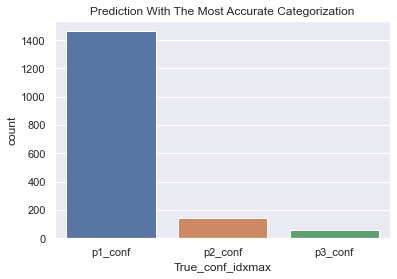

In [1169]:
# plot for the count
sns.countplot(True_values.True_conf_idxmax)
plt.title('Prediction With The Most Accurate Categorization');

**Insight**
- p1 had more correct prediction-to-confidence matrix than every other prediction iteration
- p3 had the least correct prediction-to-confidence matrix

#### Maturity

In [1174]:
# Looking at maturity
df.maturity.value_counts()

pupper          221
doggo            73
puppo            23
doggo,pupper      9
doggo,puppo       1
Name: maturity, dtype: int64

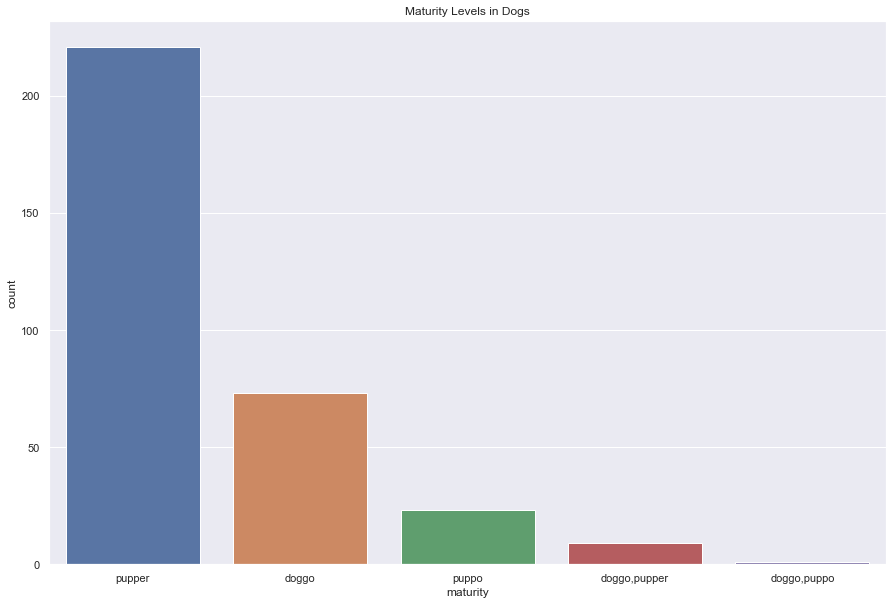

In [1241]:
# plot for the count
sns.countplot(x=df.maturity, order=df.maturity.value_counts().index)
plt.title('Maturity Levels in Dogs');

- pupper was the most occuring maturity stages for dogs in the dataset with value **221**
- doggo,puppo has the least occurance with value **1**

In [1191]:
#grouping maturity by average retweets
df.groupby('maturity')['retweets'].mean().sort_values(ascending=False)

maturity
doggo,puppo     19196.000000
puppo            6600.043478
doggo            6566.835616
doggo,pupper     4237.666667
pupper           2486.095023
Name: retweets, dtype: float64

In [1211]:
#grouping maturity by average likes
df.groupby('maturity')['likes'].mean().sort_values(ascending=False)

maturity
doggo,puppo     47844.000000
puppo           21622.565217
doggo           18047.986301
doggo,pupper    12636.888889
pupper           7249.678733
Name: likes, dtype: float64

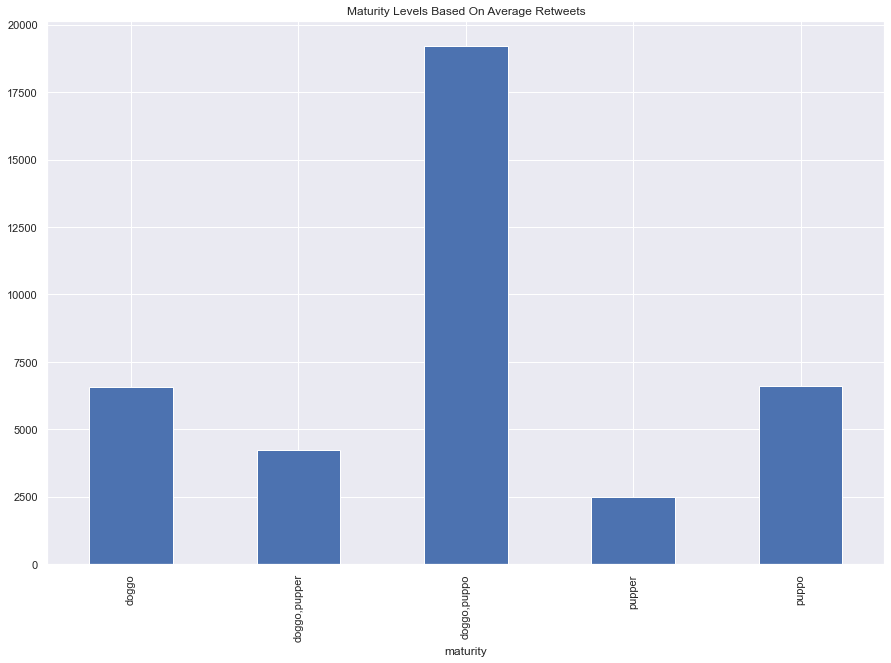

In [1213]:
# Bar plot
(df.groupby('maturity')['retweets']).mean().plot(kind='bar')
plt.title('Maturity Levels Based On Average Retweets');

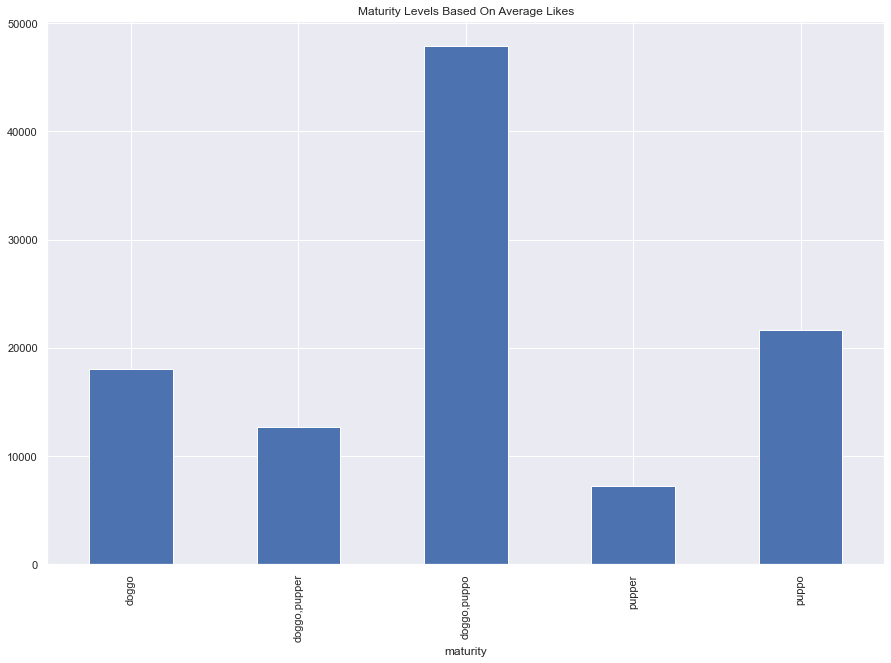

In [1214]:
# bar plot
(df.groupby('maturity')['likes']).mean().plot(kind='bar')
plt.title('Maturity Levels Based On Average Likes');

**Insight**
- doggo,puppo has the highest number of likes and retweets on average compared to other dog maturity stages
- pupper has the lowest like and retweets per average compared to other maturity stage.

### Img_num

In [1217]:
# value_count
df.img_num.value_counts()

1.0    1692
2.0     190
3.0      59
4.0      30
Name: img_num, dtype: int64

C:\Users\TonyC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


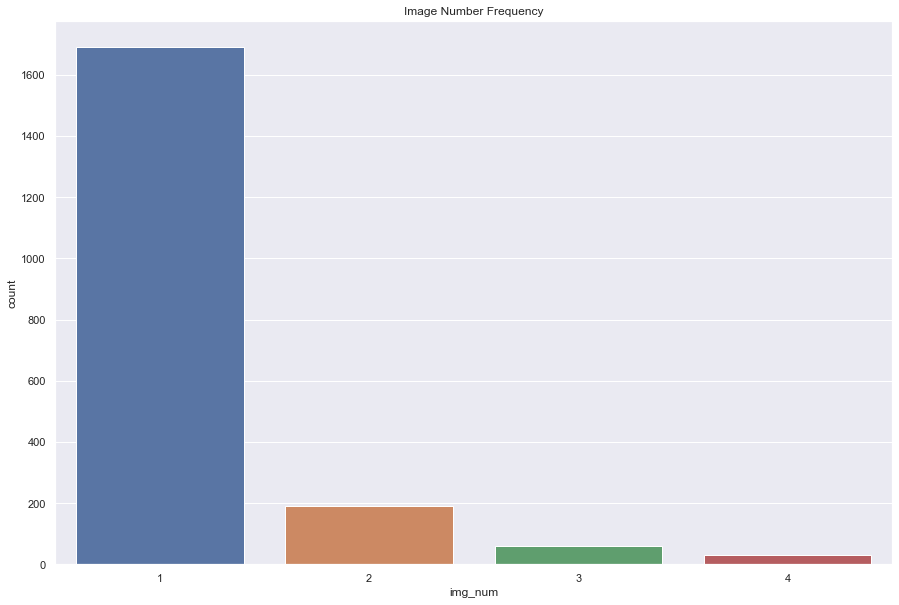

In [1220]:
# plot for the count
sns.countplot(new.img_num)
plt.title('Image Number Frequency');

**Insight**
- Most tweeets had only 1 images on them compared to the rest with a total count of **1692**
- img_num 4 is the least image number count for tweets in this data with value 30

### Source

In [1229]:
# value of source
df.source.value_counts()

Twitter for iPhone    1964
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

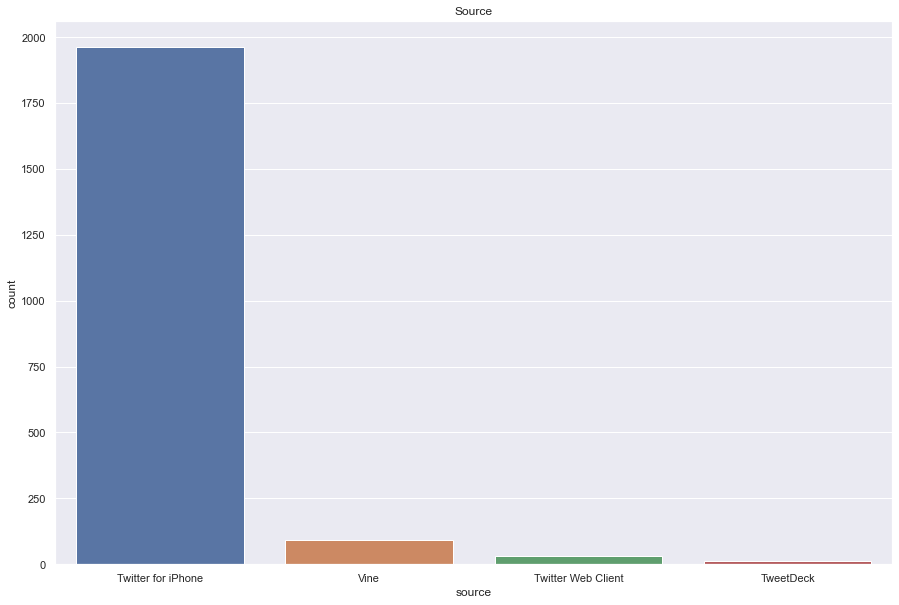

In [1230]:
# plot for the count
sns.countplot(x=df.source ,order=df.source.value_counts().index)
plt.title('Source');

**Insight**
- Twitter for iPhone was the source of majority of tweets in this dataset with value **1964**
- TweetDeck had the least tweets source on the datasets